# Exploratory Data Analysis And Feature Engineering

In [178]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


In [179]:
df = pd.read_csv('zomato.csv',encoding = 'Latin - 1')

In [180]:
df.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591


In [181]:
df.shape

(9551, 21)

In [182]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [184]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


## IN data analysis what all things we do 
1. Missing Value
2. Explore The Numerical Variables
3. Explore About Categorical Data 
4. Finding Relationship Between features

In [185]:
#Checking the Null Values In Our Dataset For All Columns
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [186]:
# Checking the another way of finfing a null value contains column
[features for  features in df.columns if df[features].isnull().sum()>0]

['Cuisines']

<Axes: >

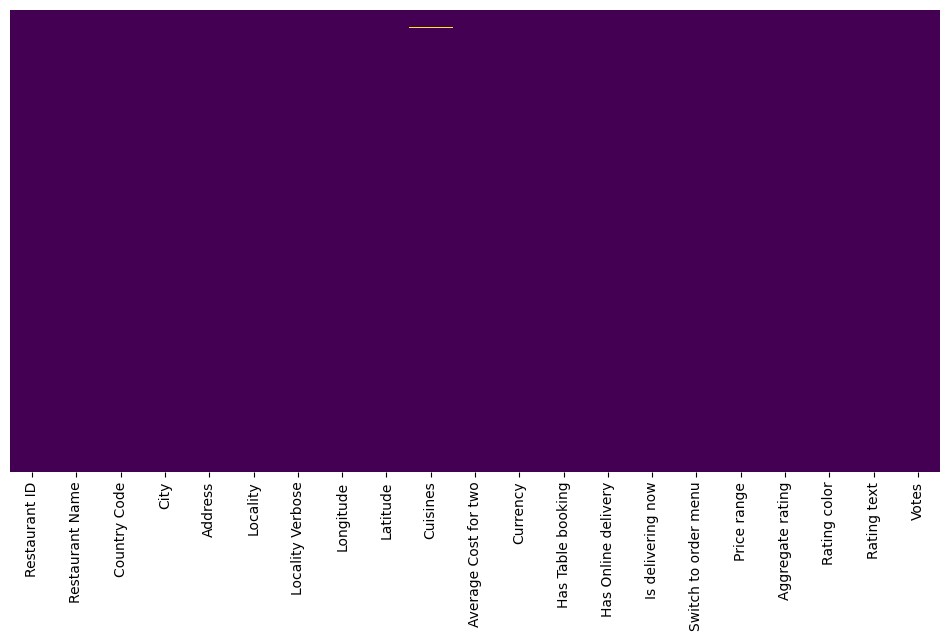

In [187]:
# checking the null vlaues using seaborns"Heatmap"
sns.heatmap(df.isnull(),yticklabels= False , cbar = False ,cmap = 'viridis')

In [188]:
# IMPORTING ANOTHER DATSSET 
df_country = pd.read_excel('Country-Code.xlsx') 
df_country.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [189]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [190]:
# merging two diffrent dataswt in one finla data that we are gonna use
zomato = pd.merge(df,df_country,on='Country Code', how = 'left')

In [191]:
zomato.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines


In [192]:
zomato.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
Country                  object
dtype: object

In [193]:
#checking Duplicaete values row
zomato.duplicated().sum()

np.int64(0)

In [194]:
zomato.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [195]:
zomato.shape

(9551, 22)

In [196]:
zomato.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

In [197]:
zomato.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


In [198]:
# Remove unrated restaurants
zomato = zomato [zomato ['Aggregate rating'] > 0]

In [199]:
# Clean binary columns we change their yes = 1 and No = 0 
zomato['Has Table booking'] = df['Has Table booking'].map({'Yes':1, 'No':0})
zomato['Has Online delivery'] = df['Has Online delivery'].map({'Yes':1, 'No':0})
zomato['Is delivering now'] = df['Is delivering now'].map({'Yes':1, 'No':0})

In [200]:
zomato.drop('Switch to order menu', axis=1, inplace=True)

In [201]:
zomato.drop([ 'Longitude', 'Latitude'], axis=1, inplace=True)

In [202]:
zomato.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7403 entries, 0 to 9550
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         7403 non-null   int64  
 1   Restaurant Name       7403 non-null   object 
 2   Country Code          7403 non-null   int64  
 3   City                  7403 non-null   object 
 4   Address               7403 non-null   object 
 5   Locality              7403 non-null   object 
 6   Locality Verbose      7403 non-null   object 
 7   Cuisines              7394 non-null   object 
 8   Average Cost for two  7403 non-null   int64  
 9   Currency              7403 non-null   object 
 10  Has Table booking     7403 non-null   int64  
 11  Has Online delivery   7403 non-null   int64  
 12  Is delivering now     7403 non-null   int64  
 13  Price range           7403 non-null   int64  
 14  Aggregate rating      7403 non-null   float64
 15  Rating color          7403

In [203]:
zomato.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...","French, Japanese, Desserts",1100,Botswana Pula(P),1,0,0,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",Japanese,1200,Botswana Pula(P),1,0,0,3,4.5,Dark Green,Excellent,591,Phillipines


In [204]:
zomato.Country.value_counts()

Country
India             6513
United States      431
United Kingdom      79
UAE                 60
South Africa        60
Brazil              55
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Singapore           20
Qatar               20
Sri Lanka           20
Canada               4
Name: count, dtype: int64

### INSIGHTS
#### * From TThe Above We Observe That THE Most Number Of Rows/Data Are From The 'India' and least number Of data/row from 'Canada'
#### * From That We Can Say The Most Nuber Of Orders Are From 'India'

In [205]:
 country_names = zomato.Country.value_counts().index
 country_names

Index(['India', 'United States', 'United Kingdom', 'UAE', 'South Africa',
       'Brazil', 'New Zealand', 'Turkey', 'Australia', 'Phillipines',
       'Indonesia', 'Singapore', 'Qatar', 'Sri Lanka', 'Canada'],
      dtype='object', name='Country')

In [206]:
country_values = zomato.Country.value_counts().values
country_values

array([6513,  431,   79,   60,   60,   55,   40,   34,   24,   22,   21,
         20,   20,   20,    4])

<Axes: ylabel='count'>

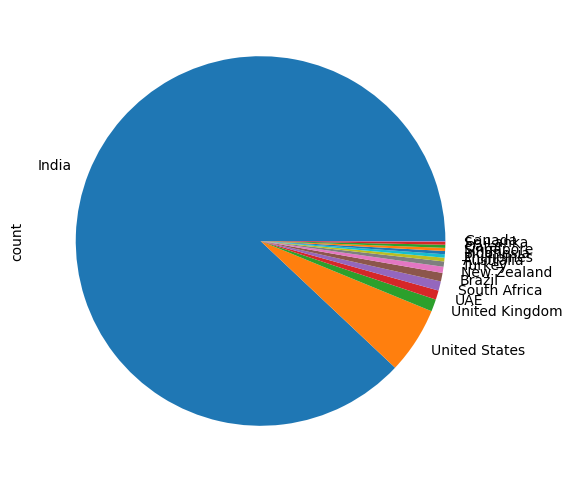

In [207]:
zomato.Country.value_counts().plot(kind = 'pie')

([<matplotlib.patches.Wedge at 0x20e7520c550>,
 [Text(-1.071498150360795, 0.24878045295680998, 'India'),
  Text(1.062039389652089, -0.2864826955112968, 'United States'),
  Text(1.0993131997528625, -0.03886500802937684, 'United Kingdom')],
 [Text(-0.5844535365604335, 0.13569842888553268, '92.74%'),
  Text(0.579294212537503, -0.1562632884607073, '6.14%'),
  Text(0.5996253816833794, -0.021199095288751, '1.12%')])

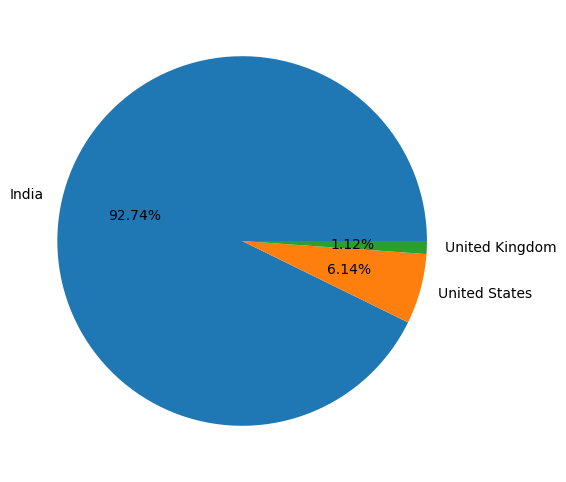

In [208]:
# pie Chart - Fro Top 3 Country That Uses Zomato 
plt.pie(country_values[:3],labels = country_names[:3],autopct = '%1.2f%%')

### Insights 
#### From The Above We Can Say Zomato Maximum Record/Transaction are from the Indai after That United States And then The United Kingdom 

## Rating

In [209]:
zomato.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Cuisines', 'Average Cost for two',
       'Currency', 'Has Table booking', 'Has Online delivery',
       'Is delivering now', 'Price range', 'Aggregate rating', 'Rating color',
       'Rating text', 'Votes', 'Country'],
      dtype='object')

In [210]:
zomato.groupby(['Aggregate rating', 'Rating color', 'Rating text']).size().head(2)

Aggregate rating  Rating color  Rating text
1.8               Red           Poor           1
1.9               Red           Poor           2
dtype: int64

In [211]:
ratings = zomato.groupby(['Aggregate rating', 'Rating color', 'Rating text']).size().reset_index().rename(columns ={ 0:'Rating Count'})

In [212]:
ratings

,Aggregate rating,Rating color,Rating text,Rating Count
0,1.8,Red,Poor,1
1,1.9,Red,Poor,2
2,2.0,Red,Poor,7
3,2.1,Red,Poor,15
4,2.2,Red,Poor,27
5,2.3,Red,Poor,47
6,2.4,Red,Poor,87
7,2.5,Orange,Average,110
8,2.6,Orange,Average,191
9,2.7,Orange,Average,250


## Insight
#### * When Rating Is 4.5 TO 4.9 ----> Excellent
#### * When Rating Is 4.0 To 4.4 ----> Very Good
#### * When Rating Is 3.5 to 3.9 ----> Good 
#### * When Rating IS 2.5 to 3.4 ----> Average
#### * When Rating IS 1.8 to 2.4 ----> Poor 
#### * When Rating is 0 ----> The Customer Not Gave A Rating

In [213]:
ratings.head()

,Aggregate rating,Rating color,Rating text,Rating Count
0,1.8,Red,Poor,1
1,1.9,Red,Poor,2
2,2.0,Red,Poor,7
3,2.1,Red,Poor,15
4,2.2,Red,Poor,27


<Axes: xlabel='Aggregate rating', ylabel='Rating Count'>

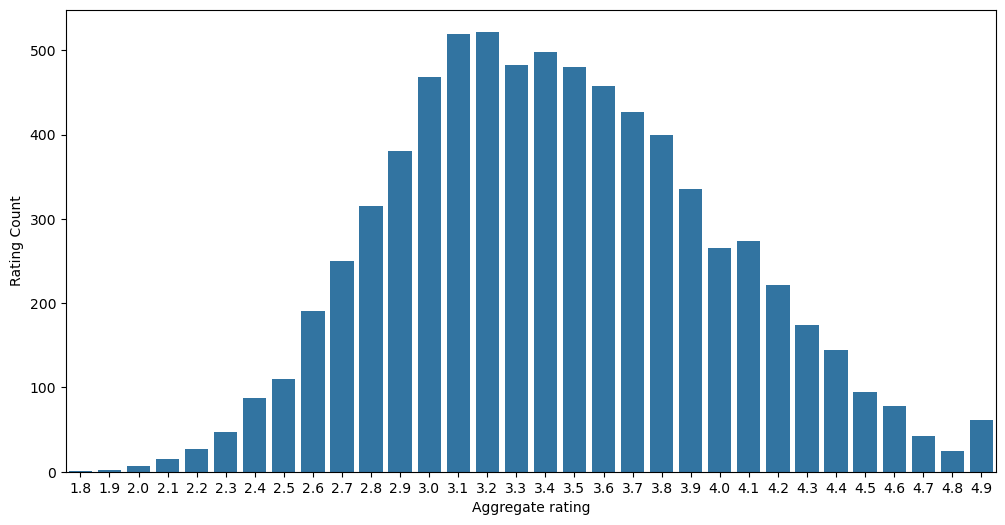

In [214]:
#Ploting A barplot for ratings 
plt.rcParams['figure.figsize'] = (12,6)
sns.barplot(x= 'Aggregate rating',y='Rating Count',data = ratings)

C:\Users\Admin\AppData\Local\Temp\ipykernel_10108\409859111.py:1: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  sns.barplot(x= 'Aggregate rating',y='Rating Count',hue = 'Rating color',data = ratings,palette = ['Blue','Red','Orange','Yellow','Green','Green'])


<Axes: xlabel='Aggregate rating', ylabel='Rating Count'>

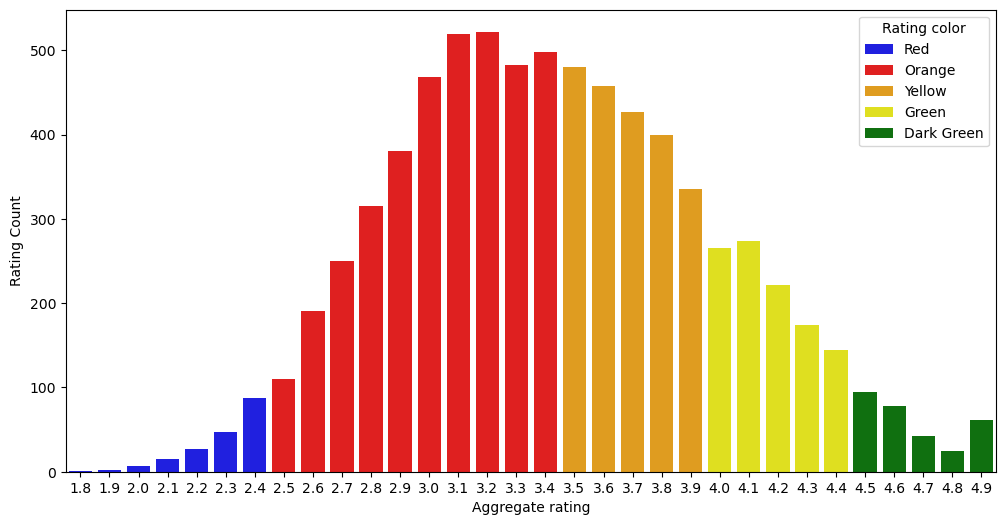

In [215]:
sns.barplot(x= 'Aggregate rating',y='Rating Count',hue = 'Rating color',data = ratings,palette = ['Blue','Red','Orange','Yellow','Green','Green'])

## Insights
 1. Not Rated Count Is Very High 
 2. Maximum Number Of Ratining Are Between 2.5 and 3.5

C:\Users\Admin\AppData\Local\Temp\ipykernel_10108\439832783.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Rating color',data= ratings,palette = ['Blue','Red','Orange','Yellow','Green','Green'])
C:\Users\Admin\AppData\Local\Temp\ipykernel_10108\439832783.py:2: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  sns.countplot(x = 'Rating color',data= ratings,palette = ['Blue','Red','Orange','Yellow','Green','Green'])


<Axes: xlabel='Rating color', ylabel='count'>

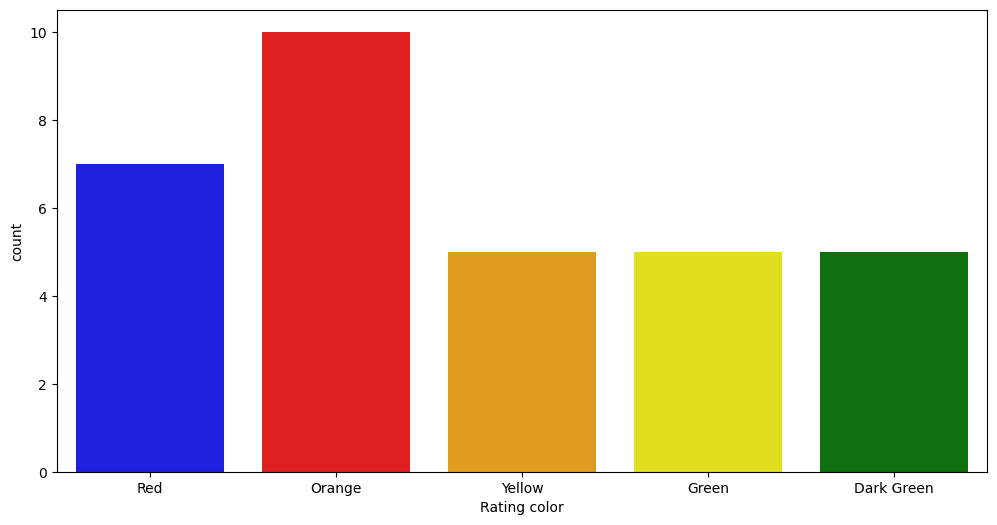

In [216]:
# Count Plot 
sns.countplot(x = 'Rating color',data= ratings,palette = ['Blue','Red','Orange','Yellow','Green','Green'])

### Find the countries name that has given 0 ratings ?

In [217]:
zomato.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...","French, Japanese, Desserts",1100,Botswana Pula(P),1,0,0,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",Japanese,1200,Botswana Pula(P),1,0,0,3,4.5,Dark Green,Excellent,591,Phillipines


In [218]:
zomato[zomato['Aggregate rating'] == 0 ]['Country'].unique()

array([], dtype=object)

In [219]:
zomato[zomato['Rating color'] == 'White'].groupby('Country').size().reset_index()

,Country,0


## Insights
 1. Maximum No=umber OF "0" Rating Is From The India

## Find Out Which Country is Used  by which Country ?

In [220]:
zomato.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...","French, Japanese, Desserts",1100,Botswana Pula(P),1,0,0,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",Japanese,1200,Botswana Pula(P),1,0,0,3,4.5,Dark Green,Excellent,591,Phillipines


In [221]:
zomato.groupby('Country') ['Currency'].unique().reset_index()

,Country,Currency
0,Australia,[Dollar($)]
1,Brazil,[Brazilian Real(R$)]
2,Canada,[Dollar($)]
3,India,[Indian Rupees(Rs.)]
4,Indonesia,[Indonesian Rupiah(IDR)]
5,New Zealand,[NewZealand($)]
6,Phillipines,[Botswana Pula(P)]
7,Qatar,[Qatari Rial(QR)]
8,Singapore,[Dollar($)]
9,South Africa,[Rand(R)]


In [222]:
zomato[['Country','Currency']].groupby(['Country','Currency']).size().reset_index()

,Country,Currency,0
0,Australia,Dollar($),24
1,Brazil,Brazilian Real(R$),55
2,Canada,Dollar($),4
3,India,Indian Rupees(Rs.),6513
4,Indonesia,Indonesian Rupiah(IDR),21
5,New Zealand,NewZealand($),40
6,Phillipines,Botswana Pula(P),22
7,Qatar,Qatari Rial(QR),20
8,Singapore,Dollar($),20
9,South Africa,Rand(R),60


## Which Country do have Online Delivery Option ?

In [223]:
zomato.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...","French, Japanese, Desserts",1100,Botswana Pula(P),1,0,0,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",Japanese,1200,Botswana Pula(P),1,0,0,3,4.5,Dark Green,Excellent,591,Phillipines


In [224]:
zomato[zomato['Has Online delivery'] == 'Yes']['Country'].unique()

array([], dtype=object)

In [225]:
zomato[zomato['Has Online delivery'] == 'Yes'].Country.value_counts()

Series([], Name: count, dtype: int64)

## Insights 
 1. Online Delivery are Availbale In Inadia And UAE Only 

In [226]:
zomato.City.value_counts().index

Index(['New Delhi', 'Gurgaon', 'Noida', 'Faridabad', 'Ghaziabad',
       'Bhubaneshwar', 'Amritsar', 'Ahmedabad', 'Lucknow', 'Guwahati',
       ...
       'Ojo Caliente', 'Montville', 'Monroe', 'Miller', 'Middleton Beach',
       'Panchkula', 'Mc Millan', 'Mayfield', 'Macedon', 'Vineland Station'],
      dtype='object', name='City', length=141)

In [227]:
city_values = zomato.City.value_counts().values
city_labels = zomato.City.value_counts().index

([<matplotlib.patches.Wedge at 0x20e77a07110>,
 [Text(-0.6380626939665683, 0.8960334807182851, 'New Delhi'),
  Text(0.1624338215486533, -1.0879408318548855, 'Gurgaon'),
  Text(0.9292196429596626, -0.5886857014892728, 'Noida'),
  Text(1.0937608555508762, -0.11699226839674351, 'Faridabad'),
  Text(1.0999148796852016, -0.013684204291388134, 'Ghaziabad')],
 [Text(-0.34803419670903724, 0.4887455349372464, '69.70%'),
  Text(0.08860026629926541, -0.5934222719208466, '15.32%'),
  Text(0.5068470779779978, -0.3211012917214215, '11.98%'),
  Text(0.5965968303004778, -0.0638139645800419, '2.60%'),
  Text(0.5999535707373826, -0.007464111431666254, '0.40%')])

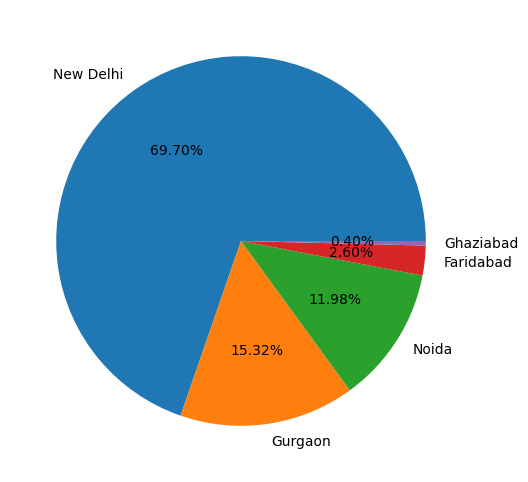

In [228]:
plt.pie(city_values[:5],labels = city_labels[:5],autopct = '%1.2f%%')

## Find THe Top 10 Cusions 

In [229]:
zomato.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...","French, Japanese, Desserts",1100,Botswana Pula(P),1,0,0,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",Japanese,1200,Botswana Pula(P),1,0,0,3,4.5,Dark Green,Excellent,591,Phillipines


In [230]:
Cuisines_values = zomato.Cuisines.value_counts().values
Cuisines_labels = zomato.Cuisines.value_counts().index

([<matplotlib.patches.Wedge at 0x20e7840f890>,
 [Text(0.8814149285383291, 0.6581092035139552, 'North Indian'),
  Text(-0.2501620690208992, 1.0711764276827525, 'North Indian, Chinese'),
  Text(-0.9949431489809648, 0.4691355137866264, 'North Indian, Mughlai'),
  Text(-1.0598123397242252, -0.29461467133913033, 'Cafe'),
  Text(-0.6864789631049157, -0.8595037133220542, 'Fast Food'),
  Text(-0.09309323735778262, -1.0960536707471253, 'Chinese'),
  Text(0.44959238873927226, -1.0039256366821776, 'North Indian, Mughlai, Chinese'),
  Text(0.7923796978808817, -0.7629773354341549, 'Bakery'),
  Text(0.9924835031732037, -0.4743168729120286, 'Bakery, Desserts'),
  Text(1.0880875790028004, -0.1614478876288712, 'Pizza, Fast Food')],
 [Text(0.48077177920272496, 0.3589686564621573, '20.41%'),
  Text(-0.1364520376477632, 0.5842780514633195, '16.47%'),
  Text(-0.5426962630805262, 0.2558920984290689, '12.20%'),
  Text(-0.5780794580313955, -0.1606989116395256, '10.46%'),
  Text(-0.37444307078449945, -0.468820

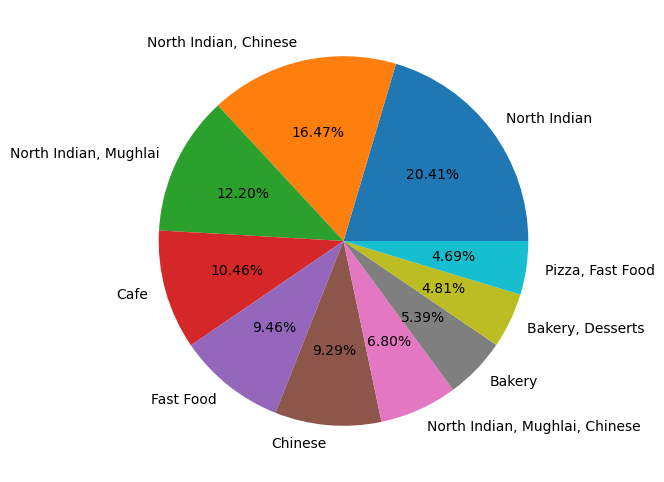

In [231]:
plt.pie(Cuisines_values[:10],labels = Cuisines_labels[:10],autopct = '%1.2f%%')

In [232]:
zomato.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...","French, Japanese, Desserts",1100,Botswana Pula(P),1,0,0,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",Japanese,1200,Botswana Pula(P),1,0,0,3,4.5,Dark Green,Excellent,591,Phillipines


 ##  Which countries have highest engagement per restaurant?

In [233]:
zomato.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...","French, Japanese, Desserts",1100,Botswana Pula(P),1,0,0,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",Japanese,1200,Botswana Pula(P),1,0,0,3,4.5,Dark Green,Excellent,591,Phillipines


In [234]:

country_engagement = (
    zomato.groupby('Country')  # Use the exact column name as it appears in df.columns
    .agg(
        Total_Restaurants=('Restaurant ID','count'),
        Avg_Engagement=('Votes','mean')
    )
    .sort_values('Avg_Engagement', ascending=False)
)

country_engagement.head()



,Total_Restaurants,Avg_Engagement
Country,,
Indonesia,21,772.095238
UAE,60,493.516667
Turkey,34,431.470588
United States,431,431.187935
Phillipines,22,407.409091


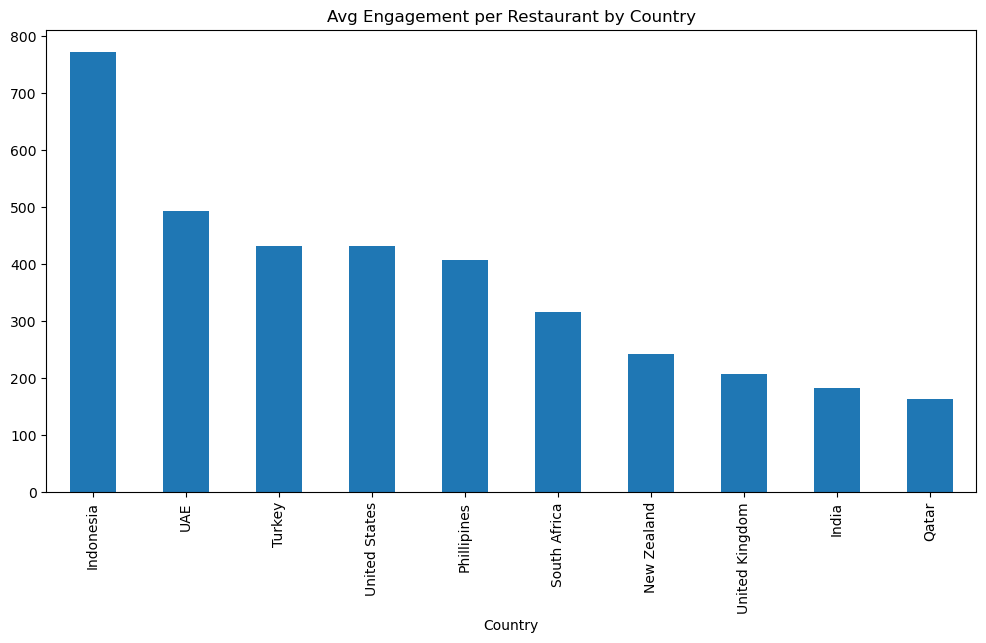

In [235]:
country_engagement['Avg_Engagement'].head(10).plot(kind='bar')
plt.title('Avg Engagement per Restaurant by Country')
plt.show()


## Insight 
 Cpuntry With Less Restaurant nut htey have maximum restaurant Engagment 

In [236]:
# Country With Maximum Restauratn registered in Zomato 
CRC = zomato[['Country','Restaurant ID']].groupby(['Country']).size().reset_index()

In [270]:
CRC2 = CRC.iloc[:5, 1:]
CRC2

,0
0,24
1,55
2,4
3,6513
4,21


In [240]:
CRC

,Country,0
0,Australia,24
1,Brazil,55
2,Canada,4
3,India,6513
4,Indonesia,21
5,New Zealand,40
6,Phillipines,22
7,Qatar,20
8,Singapore,20
9,South Africa,60


## Insighst 
 ### India has Most Maximum Number OF Restaurant 

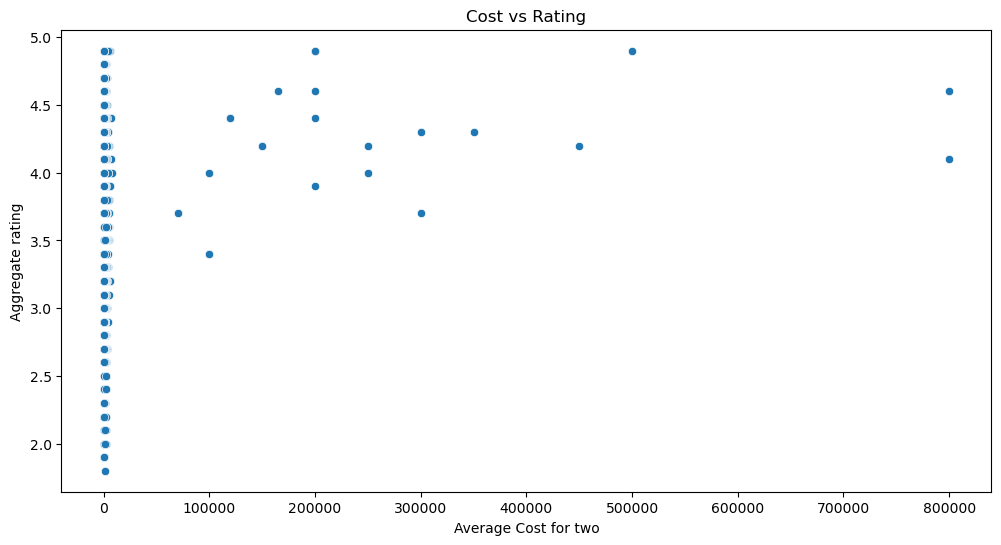

In [239]:
sns.scatterplot(
    x='Average Cost for two',
    y='Aggregate rating',
    data=zomato
)
plt.title('Cost vs Rating')
plt.show()


In [242]:
growth_index = (
    zomato.groupby('Country')
    .agg(
        Avg_Votes=('Votes','mean'),
        Delivery_Rate=('Has Online delivery','mean'),
        Avg_Cost=('Average Cost for two','mean')
    )
)

growth_index['Growth_Score'] = (
    growth_index['Avg_Votes'] *
    growth_index['Delivery_Rate'] /
    (growth_index['Avg_Cost'] + 1)
)

growth_index.sort_values('Growth_Score', ascending=False)


,Avg_Votes,Delivery_Rate,Avg_Cost,Growth_Score
Country,,,,
UAE,493.516667,0.466667,166.416667,1.375656
India,181.991402,0.357285,715.909719,0.090699
Australia,111.416667,0.000000,24.083333,0.000000
Brazil,21.272727,0.000000,142.000000,0.000000
Canada,103.000000,0.000000,36.250000,0.000000
Indonesia,772.095238,0.000000,281190.476190,0.000000
New Zealand,243.025000,0.000000,69.750000,0.000000
Phillipines,407.409091,0.000000,1606.818182,0.000000
Qatar,163.800000,0.000000,223.750000,0.000000


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         3

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      0.67      0.80         3

    accuracy                           0.80         5
   macro avg       0.83      0.83      0.80         5
weighted avg       0.87      0.80      0.80         5



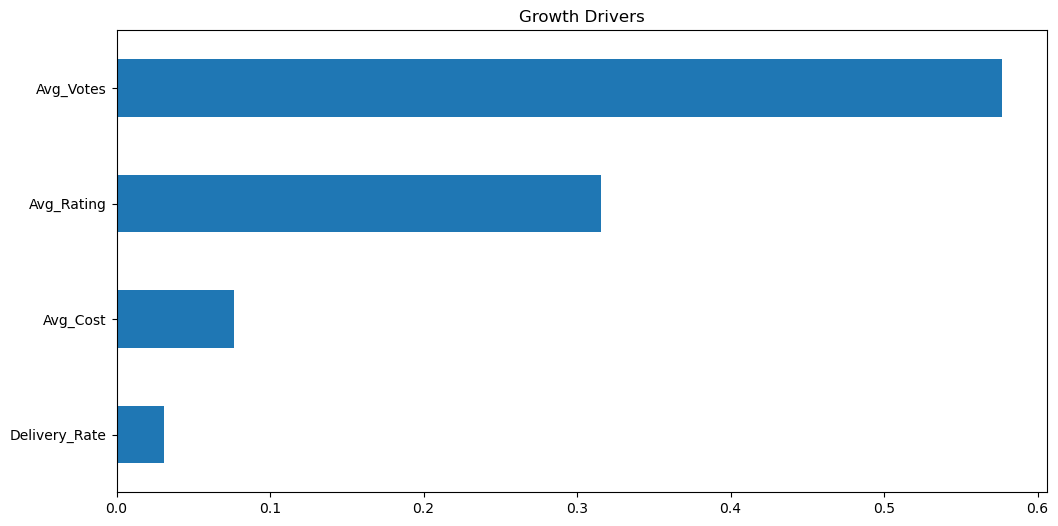